In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Reading data
df = pd.read_excel('./data/total_treatment.xlsx')

# Rename the Unnamed: 0 column to Countries
df.rename(columns={'Unnamed: 0': 'Countries'}, inplace=True)

# Creating a list with Unnamed columns
remove_cols = [col for col in df.columns if 'Unnamed' in col]

# Removing the Unnamed columns
df.drop(remove_cols, axis='columns', inplace=True)

# Replacing ":" with NaN value
df = df.replace(':', np.nan)

dtypes_dict = {
    'Countries': 'category', 
    '2004': 'float',
    '2006': 'float',
    '2008': 'float',
    '2010': 'float',
    '2012': 'float',
    '2014': 'float',
    '2016': 'float',
    '2018': 'float',
    '2020': 'float',
}

df = df.astype(dtypes_dict)

# Setting the countries name as the index
df.set_index('Countries', inplace=True)

# Keeping only the countries that we are comparing 
df = df.loc[['Ireland','Netherlands', 'Sweden', 'France', 'Denmark']]

print(df)

                    2004         2006         2008         2010         2012  \
Countries                                                                      
Ireland       18227850.0   22730497.0   16245217.0    9420759.0    8032920.0   
Netherlands   85826150.0   93008395.0   97272468.0  113720073.0  118051339.0   
Sweden        87181191.0   90563083.0   81352104.0  110475753.0  151224958.0   
France       283391472.0  292502076.0  322641264.0  331053355.0  315146903.0   
Denmark       12892738.0   14967958.0   14635672.0   13647289.0   14165252.0   

                    2014         2016         2018         2020  
Countries                                                        
Ireland        9987986.0   11767578.0   12260094.0          NaN  
Netherlands  130094410.0  139879536.0  144742308.0  121994530.0  
Sweden       163286978.0  137021154.0  131575916.0  144471109.0  
France       299663057.0  304814284.0  325288449.0  292534255.0  
Denmark       17597706.0   19062523.0   183

In [2]:
# Filling Nan values with the mean and changing the dataset so it looks more like a timeseries dataset
df = df.iloc[:, :].T.fillna(df.iloc[:, :].mean(axis='columns')).T
df_1 = df.T

# Creating a column name 'Time' for predicting steps
df_1['Time'] = np.arange(len(df_1.index))

print(df_1)

Countries       Ireland  Netherlands       Sweden       France     Denmark  \
2004       1.822785e+07   85826150.0   87181191.0  283391472.0  12892738.0   
2006       2.273050e+07   93008395.0   90563083.0  292502076.0  14967958.0   
2008       1.624522e+07   97272468.0   81352104.0  322641264.0  14635672.0   
2010       9.420759e+06  113720073.0  110475753.0  331053355.0  13647289.0   
2012       8.032920e+06  118051339.0  151224958.0  315146903.0  14165252.0   
2014       9.987986e+06  130094410.0  163286978.0  299663057.0  17597706.0   
2016       1.176758e+07  139879536.0  137021154.0  304814284.0  19062523.0   
2018       1.226009e+07  144742308.0  131575916.0  325288449.0  18301486.0   
2020       1.358411e+07  121994530.0  144471109.0  292534255.0  17349957.0   

Countries  Time  
2004          0  
2006          1  
2008          2  
2010          3  
2012          4  
2014          5  
2016          6  
2018          7  
2020          8  


In [3]:
# Training data
#---------------

# Selecting time as the feature to train the model
X = df_1.loc[:, ['Time']]  # features

# Creating a copy of X and adding the steps to predict until 2030
X_2 = X.copy()
X_2.loc['2022'] = 9
X_2.loc['2024'] = 10
X_2.loc['2026'] = 11
X_2.loc['2028'] = 12
X_2.loc['2030'] = 13

# Selecting the target for prediction
y_Ireland = df_1.loc[:, 'Ireland'] 
y_Netherlands = df_1.loc[:, 'Netherlands']
y_Sweden = df_1.loc[:, 'Sweden']
y_France = df_1.loc[:, 'France']
y_Denmark = df_1.loc[:, 'Denmark']

# Train the model
model_Ireland = LinearRegression()
model_Ireland.fit(X, y_Ireland)

model_Netherlands = LinearRegression()
model_Netherlands.fit(X, y_Netherlands)

model_Sweden = LinearRegression()
model_Sweden.fit(X, y_Sweden)

model_France = LinearRegression()
model_France.fit(X, y_France)

model_Denmark = LinearRegression()
model_Denmark.fit(X, y_Denmark)

# Predicting 
y_Ireland_pred = pd.Series(model_Ireland.predict(X_2), index=X_2.index)

y_Netherlands_pred = pd.Series(model_Netherlands.predict(X_2), index=X_2.index)

y_Sweden_pred = pd.Series(model_Sweden.predict(X_2), index=X_2.index)

y_France_pred = pd.Series(model_France.predict(X_2), index=X_2.index)

y_Denmark_pred = pd.Series(model_Denmark.predict(X_2), index=X_2.index)

In [4]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

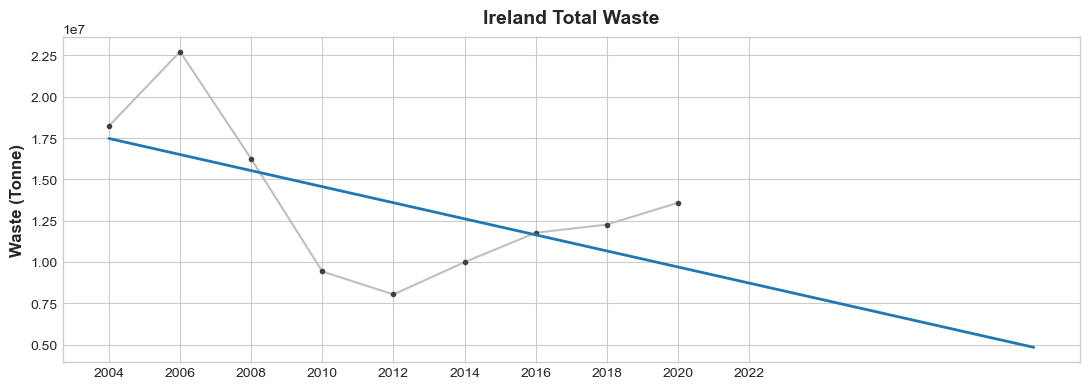

In [5]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_Ireland.plot(**plot_params)
ax = y_Ireland_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('Ireland Total Waste');

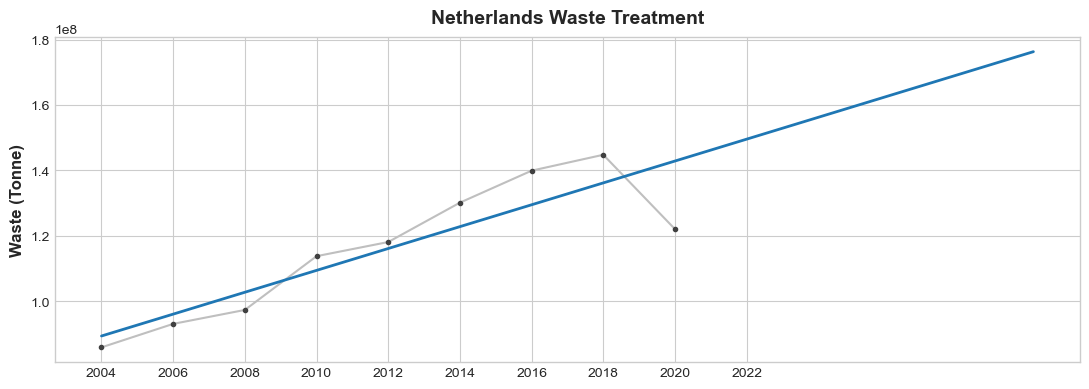

In [6]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_Netherlands.plot(**plot_params)
ax = y_Netherlands_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('Netherlands Waste Treatment');

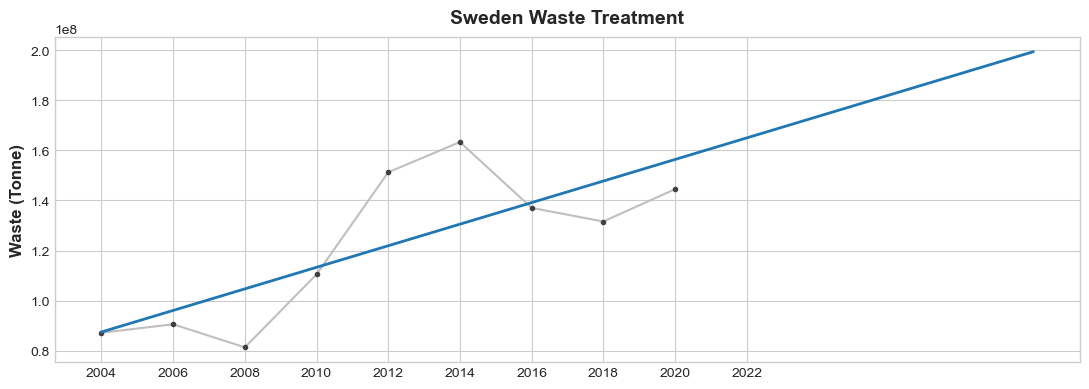

In [7]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_Sweden.plot(**plot_params)
ax = y_Sweden_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('Sweden Waste Treatment');

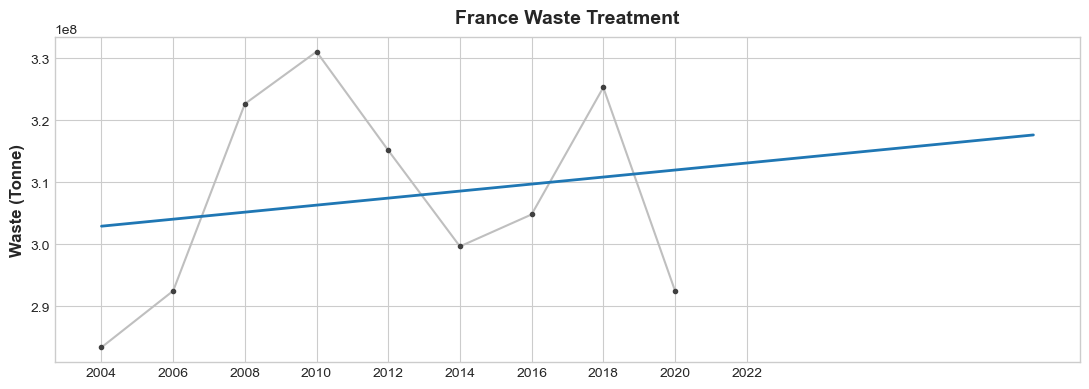

In [8]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_France.plot(**plot_params)
ax = y_France_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('France Waste Treatment');

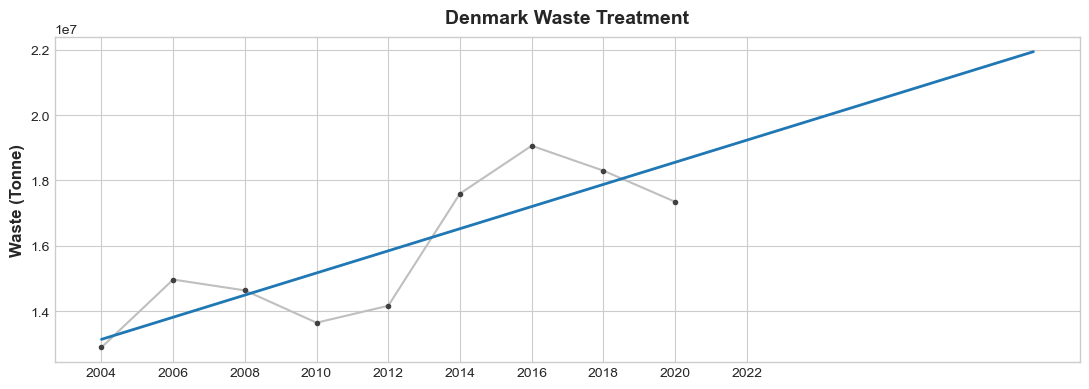

In [9]:
# Plotting the predicted values versus the real values(included the predicted values until 2030)
ax = y_Denmark.plot(**plot_params)
ax = y_Denmark_pred.plot(ax=ax, linewidth=2)
ax.set_ylabel('Waste (Tonne)', fontsize=12)
ax.set_title('Denmark Waste Treatment');

In [10]:
# Creating a list for each country with the predicted values
waste_Ireland = [df_1.loc['2010', 'Ireland'], df_1.loc['2020', 'Ireland'], y_Ireland_pred.values[13]]
waste_Netherlands = [df_1.loc['2010', 'Netherlands'], df_1.loc['2020', 'Netherlands'], y_Netherlands_pred.values[13]]
waste_Sweden = [df_1.loc['2010', 'Sweden'], df_1.loc['2020', 'Sweden'], y_Sweden_pred.values[13]]
waste_France = [df_1.loc['2010', 'France'], df_1.loc['2020', 'France'], y_France_pred.values[13]]
waste_Denmark = [df_1.loc['2010', 'Denmark'], df_1.loc['2020', 'Denmark'], y_Denmark_pred.values[13]]

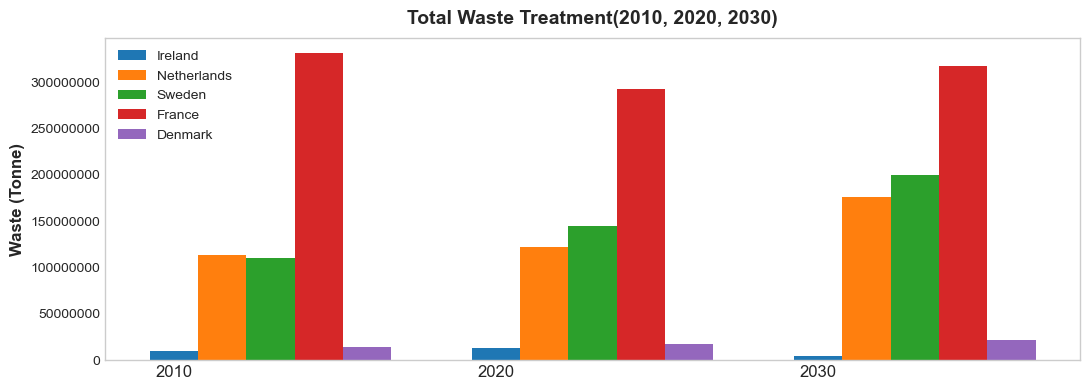

In [11]:
# Plotting the comparision of the years 2010, 2020 and 2030 of every country
width =0.15
labels = ['2010', '2020', '2030']
plt.bar(np.arange(len(waste_Ireland)), waste_Ireland, width=width)
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.bar(np.arange(len(waste_Netherlands))+ width, waste_Netherlands, width=width)
plt.bar(np.arange(len(waste_Sweden))+ (2*width), waste_Sweden, width=width)
plt.bar(np.arange(len(waste_France))+ (3*width), waste_France, width=width)
plt.bar(np.arange(len(waste_Denmark))+ (4*width), waste_Denmark, width=width)
plt.xticks(range(len(waste_Sweden)), labels, fontsize=12)
plt.ylabel('Waste (Tonne)', fontsize=12)
plt.legend(labels=['Ireland', 'Netherlands', 'Sweden', 'France', 'Denmark'], loc='upper left')
plt.title("Total Waste Treatment(2010, 2020, 2030)")
plt.grid(False)
plt.show()

In [12]:
Ireland = y_Ireland_pred.reset_index()
Ireland.rename(columns={"index": "Date", 0: "pred"}, inplace=True)
Netherlands = y_Netherlands_pred.reset_index()
Netherlands.rename(columns={"index": "Date", 0: "pred"}, inplace=True)
Sweden = y_Sweden_pred.reset_index()
Sweden.rename(columns={"index": "Date", 0: "pred"}, inplace=True)
France = y_France_pred.reset_index()
France.rename(columns={"index": "Date", 0: "pred"}, inplace=True)
Denmark = y_Denmark_pred.reset_index()
Denmark.rename(columns={"index": "Date", 0: "pred"}, inplace=True)

predictions = {'Date': Ireland['Date'],
               'Ireland': Ireland['pred'],
               'Netherlands': Netherlands['pred'],
               'Sweden': Sweden['pred'],
               'France': France['pred'],
               'Denmark': Denmark['pred'],
              }

pred_df = pd.DataFrame(data=predictions)
pred_df.drop(pred_df.index[0:9], inplace=True)
df_2 = df_1.drop('Time', axis=1)
df_2 = df_2.reset_index()
df_2.rename(columns={"index": "Date"}, inplace=True)
predictions_df = pd.concat([df_2, pred_df], ignore_index=False)
predictions_df.iloc[:, 1:] = predictions_df.iloc[:, 1:].apply(np.ceil)
predictions_df.to_json('DA_Treatment.json', orient = "records", lines=True)